<a href="https://colab.research.google.com/github/MahaThafar/ImageAugmentation/blob/main/GANs_DAUG_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Augmentation Tutorial using several libraries..**

## **Second: Generative-Based Image Augmentation using GANs**

## ​The provided Python notebook, GAN_DAUG.ipynb, demonstrates how to use Generative Adversarial Networks (GANs) for image augmentation, specifically focusing on the MNIST dataset.

#Data Augmentation

# Complete GAN Training Code with Image Generation & Visualization
> This is the complete implementation of a Generative Adversarial Network (GAN) for generating MNIST images, including:
* ✅ Generator & Discriminator Models
* ✅ Training the GAN
* ✅ Visualizing Generated Images









In [20]:
#1️⃣ Importing Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Reshape, LeakyReLU
from keras.layers import Activation
from keras.optimizers import Adam

import sys

In [21]:
#2️⃣ Loading and Preprocessing the MNIST Dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Keep 28x28 shape


In [22]:
#3️⃣ Define Generator
def create_generator():
    generator = Sequential()
    generator.add(Dense(256, input_dim=100))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(28 * 28 * 1, activation='tanh'))  # Match MNIST size
    generator.add(Reshape((28, 28, 1)))  # Output shape
    return generator


In [23]:
# 4️⃣ Define Discriminator
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Flatten(input_shape=(28, 28, 1)))  # Flatten for Dense layer
    discriminator.add(Dense(1024))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(1, activation='sigmoid'))  # Output: Real or Fake
    return discriminator


In [24]:
#5️⃣Initialize Generator & Discriminator (Created ONCE)
generator = create_generator()
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])


In [25]:
# 6️⃣ Create & Compile GAN
discriminator.trainable = False
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))




In [33]:
#7️⃣ Define Training Function to train the GAN

def train_gan(epochs, batch_size=128):
    batch_count = X_train.shape[0] // batch_size  # Number of batches per epoch

    for epoch in range(epochs):
        total_d_loss = 0  # Track total discriminator loss per epoch
        total_g_loss = 0  # Track total generator loss per epoch

        for _ in range(batch_count):
            # Generate random noise
            noise = np.random.normal(0, 1, (batch_size, 100))
            generated_images = generator.predict(noise, verbose=0)  # Suppress print output

            # Select a batch of real images
            real_images = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

            # Combine Real and Fake Images
            X = np.concatenate([real_images, generated_images], axis=0)
            y_dis = np.zeros(2 * batch_size)  # Fake = 0, Real = 1
            y_dis[:batch_size] = 0.9  # Label smoothing for real images

            # Train Discriminator (Manually suppressing batch-wise output)
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y_dis)  # Remove reset_metrics argument
            total_d_loss += d_loss[0]  # Accumulate loss

            # Train Generator via GAN
            noise = np.random.normal(0, 1, (batch_size, 100))
            y_gen = np.ones(batch_size)  # Generator wants output to be "real"
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y_gen)  # Remove reset_metrics argument
            total_g_loss += g_loss  # Accumulate loss

        # Compute average loss per epoch
        avg_d_loss = total_d_loss / batch_count
        avg_g_loss = total_g_loss / batch_count

        # Print only once per epoch
        print(f"Epoch {epoch + 1}/{epochs} - Discriminator Loss: {avg_d_loss:.4f} - Generator Loss: {avg_g_loss:.4f}")

        # Save & Plot Generated Images Every 10 Epochs
        if epoch % 2 == 0:
            plot_generated_images(epoch, generator)




In [34]:
# Define Function to Visualize Generated Images
def plot_generated_images(epoch, generator, examples=16, dim=(4, 4), figsize=(6, 6)):
    noise = np.random.normal(0, 1, (examples, 100))  # Generate random noise
    generated_images = generator.predict(noise)  # Generate images
    generated_images = generated_images.reshape(examples, 28, 28)  # Reshape

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], cmap='gray')  # Display grayscale image
        plt.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()


Epoch 1/10 - Discriminator Loss: 0.4675 - Generator Loss: 1.7869
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


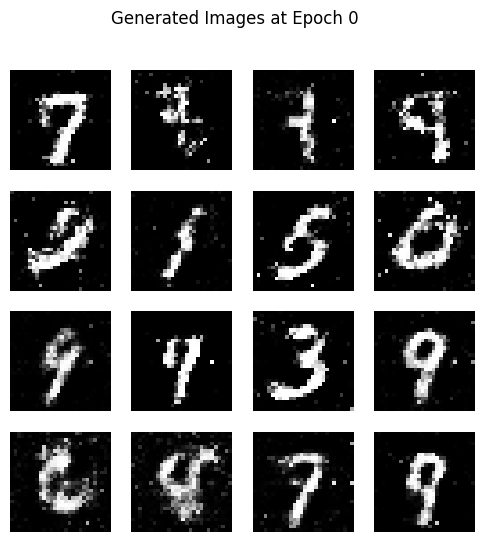

Epoch 2/10 - Discriminator Loss: 0.4724 - Generator Loss: 1.7640
Epoch 3/10 - Discriminator Loss: 0.4767 - Generator Loss: 1.7441
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


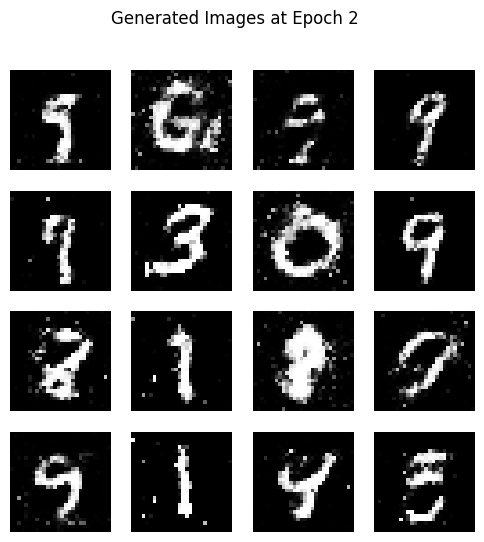

Epoch 4/10 - Discriminator Loss: 0.4812 - Generator Loss: 1.7253
Epoch 5/10 - Discriminator Loss: 0.4855 - Generator Loss: 1.7070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


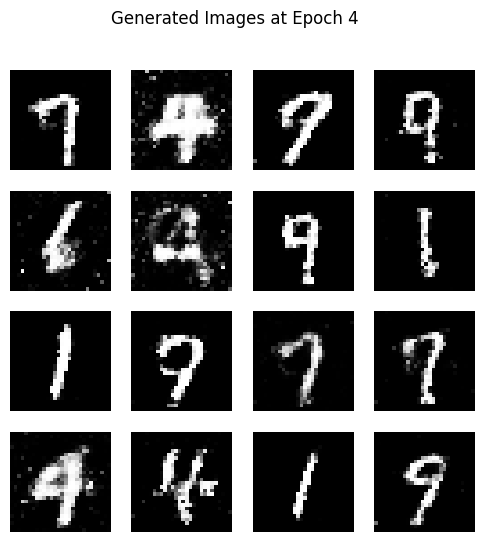

Epoch 6/10 - Discriminator Loss: 0.4892 - Generator Loss: 1.6906
Epoch 7/10 - Discriminator Loss: 0.4926 - Generator Loss: 1.6761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


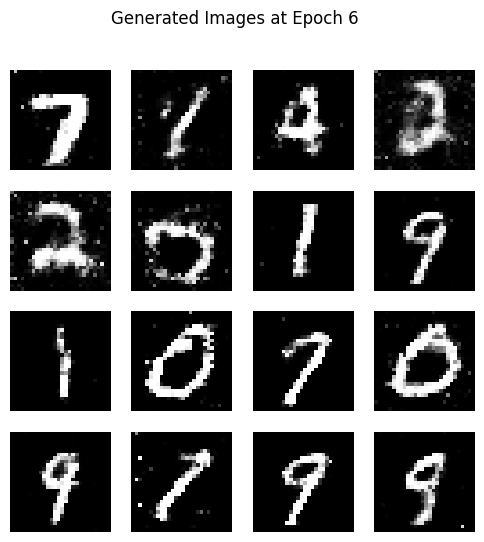

Epoch 8/10 - Discriminator Loss: 0.4960 - Generator Loss: 1.6616
Epoch 9/10 - Discriminator Loss: 0.4988 - Generator Loss: 1.6499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


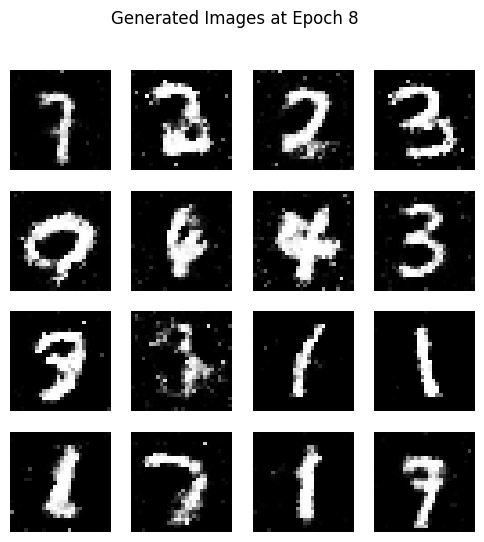

Epoch 10/10 - Discriminator Loss: 0.5013 - Generator Loss: 1.6390


In [35]:
# 8️⃣ Train the GAN
train_gan(epochs=10, batch_size=128)

## Does GAN Generate Better Images Each Epoch?
#### ✅ Yes! The generated images improve over time.

> At first, the images are random noise.
Each epoch, the Generator learns from the Discriminator’s feedback and improves.
After many epochs, the images start to look realistic.


---


💡 Example:
*   Epoch 1 → Blurry shapes 🔺
*   Epoch 50 → Slightly structured images
*   Epoch 200 → High-quality, realistic images! 🖼️







